<a href="https://colab.research.google.com/github/rohansaha13/Event-Detection-in-a-Power-Microgrid-using-Deep-Learning/blob/main/Exploratory_Project_Code_SRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
seed=7
np.random.seed(seed)

In [ ]:
import xlrd
xlrd.__VERSION__

'1.1.0'

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.xlsx to dataset (1).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['dataset.xlsx']))
df1=df.values
df

,Current 1,P_L 1,Current 2,P_L 2,Current 3,P_L 3,Current Ideal,P_L Ideal,Time
0,8.858,492.0,5.249,1093.0,1.9690,1640.0,9.465000e-05,1968.0,1.0
1,4.429,246.0,2.625,546.7,0.9844,820.0,8.514000e-05,984.0,2.0
2,4.429,246.0,2.625,546.7,0.9844,820.0,-9.609000e-11,984.0,3.0
3,4.429,246.0,2.625,546.7,0.9844,820.0,-9.609000e-11,984.0,4.0
4,4.429,246.0,2.625,546.7,0.9844,820.0,-9.609000e-11,984.0,5.0
5,7.382,410.0,4.374,911.1,1.6400,1670.0,5.178000e-06,1640.0,6.0
6,14.760,819.9,8.748,1822.0,3.2800,2733.0,-9.125000e-05,3280.0,7.0
7,26.570,1476.0,15.750,3280.0,5.9050,4919.0,-1.579000e-04,5903.0,8.0
8,29.530,1640.0,17.500,3644.0,6.5610,5466.0,5.177000e-06,6559.0,9.0
9,14.760,819.9,8.749,1822.0,3.2810,2733.0,3.462000e-04,3280.0,10.0


In [ ]:
po=pd.DataFrame(columns=['current','load','result','Time'])

In [ ]:
po

,current,load,result,Time


In [ ]:
for i in range(23):
    po=po.append({'current':df.at[i,"Current 1"],'load':df.at[i,"P_L 1"],'result':1,'Time':df.at[i,"Time"]},ignore_index=True)

po

,current,load,result,Time
0,8.858,492.0,1.0,1.0
1,4.429,246.0,1.0,2.0
2,4.429,246.0,1.0,3.0
3,4.429,246.0,1.0,4.0
4,4.429,246.0,1.0,5.0
5,7.382,410.0,1.0,6.0
6,14.760,819.9,1.0,7.0
7,26.570,1476.0,1.0,8.0
8,29.530,1640.0,1.0,9.0
9,14.760,819.9,1.0,10.0


In [ ]:
for i in range(23):
    po=po.append({'current':df.at[i,"Current 2"],'load':df.at[i,"P_L 2"],'result':2,'Time':df.at[i,"Time"]},ignore_index=True)

po

,current,load,result,Time
0,8.858,492.0,1.0,1.0
1,4.429,246.0,1.0,2.0
2,4.429,246.0,1.0,3.0
3,4.429,246.0,1.0,4.0
4,4.429,246.0,1.0,5.0
5,7.382,410.0,1.0,6.0
6,14.760,819.9,1.0,7.0
7,26.570,1476.0,1.0,8.0
8,29.530,1640.0,1.0,9.0
9,14.760,819.9,1.0,10.0


In [ ]:
for i in range(23):
    po=po.append({'current':df.at[i,"Current 3"],'load':df.at[i,"P_L 3"],'result':3,'Time':df.at[i,"Time"]},ignore_index=True)

po

,current,load,result,Time
0,8.858,492.0,1.0,1.0
1,4.429,246.0,1.0,2.0
2,4.429,246.0,1.0,3.0
3,4.429,246.0,1.0,4.0
4,4.429,246.0,1.0,5.0
...,...,...,...,...
64,7.544,6286.0,3.0,19.0
65,7.217,6013.0,3.0,20.0
66,7.217,6013.0,3.0,21.0
67,7.545,6286.0,3.0,22.0


In [ ]:
for i in range(23):
    po=po.append({'current':df.at[i,"Current Ideal"],'load':df.at[i,"P_L Ideal"],'result':0,'Time':df.at[i,"Time"]},ignore_index=True)

In [ ]:
po

,current,load,result,Time
0,8.858000e+00,492.0,1.0,1.0
1,4.429000e+00,246.0,1.0,2.0
2,4.429000e+00,246.0,1.0,3.0
3,4.429000e+00,246.0,1.0,4.0
4,4.429000e+00,246.0,1.0,5.0
...,...,...,...,...
87,-2.698000e-04,7543.0,0.0,19.0
88,-6.212000e-05,7215.0,0.0,20.0
89,-7.047000e-10,7215.0,0.0,21.0
90,-2.718000e-05,7543.0,0.0,22.0


In [ ]:
po = pd.concat([po,pd.get_dummies(po['Time'], prefix='Time',dummy_na=True)],axis=1).drop(['Time'],axis=1)

In [ ]:
po

,current,load,result,Time_1.0,Time_2.0,Time_3.0,Time_4.0,Time_5.0,Time_6.0,Time_7.0,...,Time_15.0,Time_16.0,Time_17.0,Time_18.0,Time_19.0,Time_20.0,Time_21.0,Time_22.0,Time_23.0,Time_nan
0,8.858000e+00,492.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.429000e+00,246.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.429000e+00,246.0,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.429000e+00,246.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.429000e+00,246.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-2.698000e-04,7543.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
88,-6.212000e-05,7215.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
89,-7.047000e-10,7215.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
90,-2.718000e-05,7543.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
poo=po.values

poo

array([[ 8.858e+00,  4.920e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [-7.047e-10,  7.215e+03,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.718e-05,  7.543e+03,  0.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.359e-04,  5.903e+03,  0.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [ ]:
yy=poo[:,2]
po.drop(['result'],axis="columns",inplace=True)

In [ ]:
yy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [ ]:
XX=poo[:,:]

In [ ]:
XX

array([[ 8.858e+00,  4.920e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [-7.047e-10,  7.215e+03,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.718e-05,  7.543e+03,  0.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.359e-04,  5.903e+03,  0.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [ ]:
import tensorflow as tf

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
def neural_net():
    model = Sequential()
    model.add(Dense(256, input_dim=27, kernel_initializer='normal', activation='swish'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='swish'))
    model.add(Dense(64, kernel_initializer='normal', activation='swish'))
    model.add(Dropout(0.5))
    model.add(Dense(32, kernel_initializer='normal', activation='swish'))
    model.add(Dense(16, kernel_initializer='normal', activation='swish'))

    model.add(Dense(8, kernel_initializer='normal', activation='swish'))
    
    model.add(Dense(4, kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
import keras

In [ ]:
pip install np_utils

In [ ]:
from keras.utils import np_utils

In [ ]:


encoder = LabelEncoder()
encoder.fit(yy)
encoded_Y = encoder.transform(yy)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
dummy_y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [ ]:
dummy_XX=XX

In [ ]:
dummy_XX

array([[ 8.858e+00,  4.920e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.429e+00,  2.460e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [-7.047e-10,  7.215e+03,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.718e-05,  7.543e+03,  0.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.359e-04,  5.903e+03,  0.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [ ]:
scaler=StandardScaler()

In [ ]:
dummy_XX=scaler.fit_transform(dummy_XX)

In [ ]:
dummy_XX

array([[-0.13554233, -0.94174016, -0.4472136 , ..., -0.21320072,
        -0.21320072,  0.        ],
       [-0.53729721, -1.06302048, -0.4472136 , ..., -0.21320072,
        -0.21320072,  0.        ],
       [-0.53729721, -1.06302048, -0.4472136 , ..., -0.21320072,
        -0.21320072,  0.        ],
       ...,
       [-0.93905208,  2.37276216, -1.34164079, ..., -0.21320072,
        -0.21320072,  0.        ],
       [-0.93905454,  2.53446925, -1.34164079, ...,  4.69041576,
        -0.21320072,  0.        ],
       [-0.93903975,  1.7259338 , -1.34164079, ..., -0.21320072,
         4.69041576,  0.        ]])

In [ ]:
mm=neural_net()
history=mm.fit(XX,dummy_y,epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 7ms/step - loss: 1.3835 - accuracy: 0.2283
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3731 - accuracy: 0.2174
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3691 - accuracy: 0.2500
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3475 - accuracy: 0.2935
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3469 - accuracy: 0.3261
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 1.3280 - accuracy: 0.2500
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 1.3163 - accuracy: 0.2609
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3238 - accuracy: 0.2500
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 1.3235 - accuracy: 0.2609
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 1.3029 - accuracy: 0.2609
Epoch 11/500
3/3 [===========

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy'])


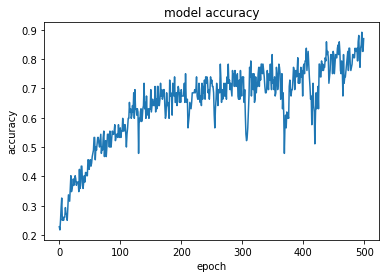

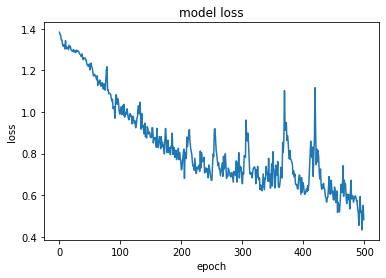

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()